# 目的：CIFAR-10の画像分類をテーマに、画像処理・CNNについての理解を深める

**1. CIFAR-10 について（リンク）**
https://www.cs.toronto.edu/~kriz/cifar.html

> CIFAR-10 データセットには 60000 枚の画像が含まれており、 それらは全て 10 種類のクラスのいずれかに分類され、 全てのクラスに同じ枚数だけ、すなわち 6000 枚ずつ、の画像を入れている。 どれに分類されるかも勿論データセットに入っていて故にラベル付きである。 60000 枚の画像のうち、50000 枚が訓練用、残り 10000 枚がテスト用。

> 各画像は画素数 32x32 で RGB で彩色されている。



> クラスには10種類があり、次の通り:

> airplane; 飛行機  
  automobile; 自動車(トラック以外)  
bird; 鳥  
cat; 猫  
deer; 鹿  
dog; 犬  
frog; 蛙  
horse; 馬  
ship; 船, 舟  
truck; 大型トラック  


> また、データセットはいい感じにシャッフルされており、 順番に見ていくと各クラスはランダムに出現する。







**・データセットの詳細**
```
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

戻り値 2つのタプル:
x_train, x_test: shape (num_samples, 3, 32, 32) のRGB画像データのuint8配列．
y_train, y_test: shape (num_samples,) のカテゴリラベル(0-9の範囲のinteger)のuint8配列．
```

**2. 前準備**
> はじめにライブラリのインポートとデータセットの読み込みをする。



In [3]:
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt

import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import keras
from keras import backend as K
from keras.datasets import cifar10
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import plot_model

img_rows, img_cols, img_channels = 32, 32, 3
num_classes = 10
batch_size = 64

# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('x_train.shape', x_train.shape)
# ('x_train.shape', (50000, 32, 32, 3))

print('y_train.shape', y_train.shape)
# ('y_train.shape', (50000, 10))

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train.shape (50000, 32, 32, 3)
y_train.shape (50000, 10)




> 読み込んだ画像を表示


> - google colabの場合を下記を記入する必要あり
```
from IPython.display import Image,display_jpeg
display_jpeg(Image('cifar10_image_train.png')
```

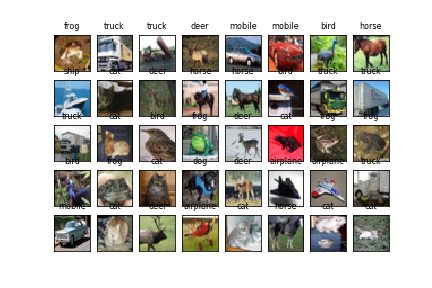

In [4]:
LABELS = ('airplane', 'mobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse','ship', 'truck')

def index_to_label(idx):
  if idx < len(LABELS): #インデックス付きループ
    return LABELS[idx]
  else:
    return None

def vector_to_label(v):
  idx = np.argmax(v) #多次元配列の中の最大値の要素を持つインデックスを返す関数
  return index_to_label(idx)
  
plt.clf()
for i in range(0, 40):
  plt.subplot(5, 8, i+1)
  pixels = x_train[i,:,:,:]
  plt.title(vector_to_label(y_train[i]), fontsize=8)
  fig = plt.imshow(pixels)
  fig.axes.get_xaxis().set_visible(False)
  fig.axes.get_yaxis().set_visible(False)

plt.savefig('cifar10_image_train.png')

from IPython.display import Image,display_png
display_png(Image('cifar10_image_train.png'))

**3. 機械学習モデル** 

In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 strides=(1, 1), padding='valid',
                 activation='relu',
                 input_shape=(img_rows, img_cols, img_channels)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


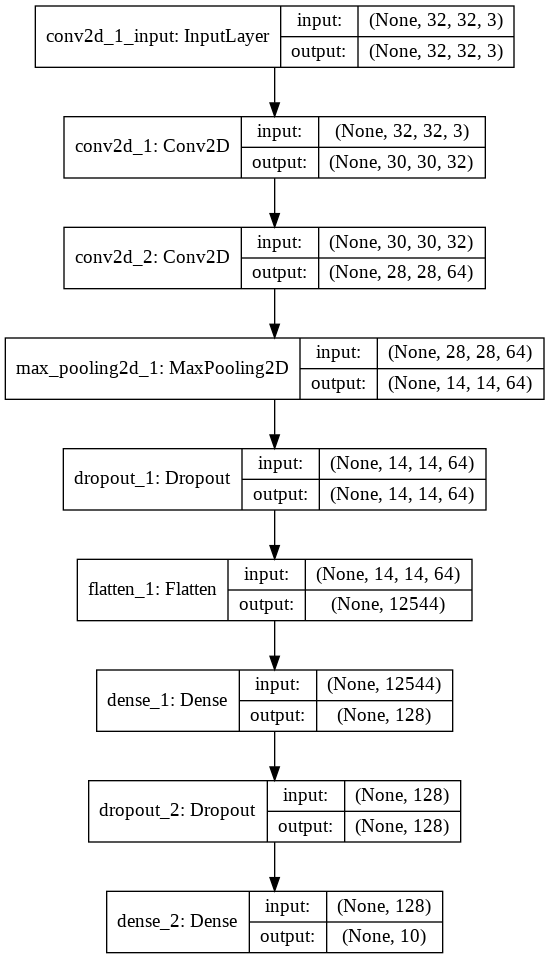

In [6]:
plot_model(model, to_file='model1.png', show_shapes=True)

**4. 訓練（トレーニング）** 

In [7]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
hist = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=20,
                 validation_split=0.1,
                 verbose=1)
scores = model.evaluate(x_test, y_test)
print('loss={}, accuracy={}'.format(*scores))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 45000 samples, validate on 5000 samples
Epoch 1/20





45000/45000 [==============================] - 22s 494us/step - loss: 1.6750 - acc: 0.3976 - val_loss: 1.4145 - val_acc: 0.4834
Epoch 2/20
45000/45000 [==============================] - 7s 153us/step - loss: 1.2561 - acc: 0.5565 - val_loss: 1.1547 - val_acc: 0.6010
Epoch 3/20
45000/45000 [==============================] - 7s 151us/step - loss: 1.0903 - acc: 0.6175 - val_loss: 1.0480 - val_acc: 0.6286
Epoch 4/20
45000/45000 [==============================] - 7s 151us/step - loss: 0.9843 - acc: 0.6574 - val_loss: 0.9781 - val_acc: 0.6584
Epoch 5/20
45000/45000 [==============================] - 7s 153us/step - loss: 0.9072 - acc: 0.6835 - val_loss: 1.0505 - val_acc: 0.6226
Epoch 6/20
45000/45000 [==============================] - 7s 153us/step - loss: 0.8440 - acc: 0.7067 - val_loss: 0.9572 - val_acc: 0.6766
Epoch 7/20
45000/4

**5. 学習曲線を描く** 

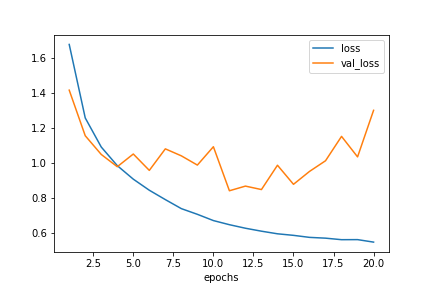

In [10]:
plt.clf()
plt.xlabel('epochs')
plt.plot(np.arange(1, len(hist.history['loss'])+1),
         hist.history['loss'], label='loss')
plt.plot(np.arange(1, len(hist.history['loss'])+1),
         hist.history['val_loss'], label='val_loss')
plt.legend()
plt.savefig('model1-loss.png')

from IPython.display import Image,display_png
display_png(Image('model1-loss.png'))

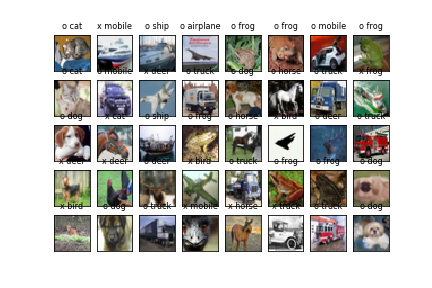

In [14]:
y_predicted = model.predict(x_test)

plt.clf()
for i in range(0, 40):
  plt.subplot(5, 8, i+1)
  pixels = x_test[i,:,:,:]
  isok = np.argmax(y_test[i]) == np.argmax(y_predicted[i])
  plt.title('{} {}'.format('o' if isok else 'x',
                           vector_to_label(y_predicted[i])),
			fontsize=8)
  fig = plt.imshow(pixels)
  fig.axes.get_xaxis().set_visible(False)
  fig.axes.get_yaxis().set_visible(False)

plt.savefig('cifar10-model1-predicted.png')

from IPython.display import Image,display_png
display_png(Image('cifar10-model1-predicted.png'))

In [28]:
def print_predicted(i):
  asc = np.argsort(y_predicted[i])
  for j in range(0, 3):
    idx = asc[-j-1]
    print(str(i+1)+"枚目の確率"+str(j+1)+"位")
    print('{}: {:2.1f}%'.format(index_to_label(idx), y_predicted[i][idx] * 100))
    print("\n")
for i in range(0, 4):
  print_predicted(i)


1枚目の確率1位
cat: 99.3%


1枚目の確率2位
dog: 0.6%


1枚目の確率3位
frog: 0.1%


2枚目の確率1位
mobile: 89.5%


2枚目の確率2位
ship: 10.5%


2枚目の確率3位
airplane: 0.0%


3枚目の確率1位
ship: 88.8%


3枚目の確率2位
airplane: 6.1%


3枚目の確率3位
mobile: 4.9%


4枚目の確率1位
airplane: 61.6%


4枚目の確率2位
mobile: 34.3%


4枚目の確率3位
bird: 2.3%


